In [1]:
import pandas as pd

In [ ]:
data=pd.read_csv('feature_dengue.csv')
dataframe=pd.DataFrame(data)

In [ ]:
dataframe.head(5)

In [ ]:
columns=['precipitation_amt_mm','reanalysis_relative_humidity_percent','station_avg_temp_c','total_cases']
df=dataframe.filter(columns).dropna()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(df)
df=scaler.transform(df)

train=df[:,[0,1,2]]
test=df[:,3]

x_train,x_test,y_train,y_test=train_test_split(train,test,test_size=0.2)

In [ ]:
print(x_train.shape)
print(y_train.shape)

## Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regr=DecisionTreeRegressor(max_depth=5).fit(x_train,y_train)

## SVM Regressor

In [ ]:
from sklearn.svm import SVR
clf=SVR(kernel='linear', C=1e3).fit(x_train,y_train)

## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_regr = RandomForestRegressor(max_depth=2, random_state=0).fit(x_train,y_train)

## Validate

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,regr.predict(x_test)))
print(mean_squared_error(y_test,clf.predict(x_test)))
print(mean_squared_error(y_test,rf_regr.predict(x_test)))

## Save MinMaxScaler model

In [ ]:
from sklearn.externals import joblib 
joblib.dump(scaler,'Scaler.pkl')

In [ ]:
scaler = joblib.load("Scaler.pkl") 

## Save ML Models

In [ ]:
joblib.dump(regr,'dt_regr.pkl')
joblib.dump(clf,'svm_regr.pkl')
joblib.dump(rf_regr,'randf_regr.pkl')

## Mean of Difference Vegetation Index(NDVI) [ne,nw,se,sw]

In [ ]:
columns_mean=['ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw']
df1=dataframe.filter(columns_mean)
mean_ndvi=df1.mean(axis=1)

mean_ndvi.to_csv('ndvi_mean', encoding='utf-8', index=False)

In [ ]:
mean_ndvi.shape

## Zika values additional removal

In [ ]:
import numpy as np

dataframe_new=pd.read_csv('feature_dengue.csv')
df=pd.DataFrame(dataframe_new)

df_array = np.array(df['zika_value'])
df_new=df_array[df_array!=['0']]

In [ ]:
df_new=pd.DataFrame(df_new)
df_new=df_new.dropna()
df_new=df[:dataframe.shape[0]]

In [ ]:
df_new.to_csv('zika_filtered',encoding='utf-8',index=False)

### Work on Filtered Dataset

In [ ]:
filtered_data=pd.read_csv('feature_dengue.csv')
filtered_df=pd.DataFrame(filtered_data).dropna()

scaler=MinMaxScaler()
scaler.fit(filtered_df)
filtered_df=scaler.transform(filtered_df)

train=filtered_df[:,[0,1,2,3]]
train_disease=filtered_df[:,[4,5,6]]

x_train_disease,x_test_disease,y_train_disease,y_test_disease=train_test_split(train,train_disease,test_size=0.2)

In [ ]:
print(x_train_disease.shape)
print(y_train_disease.shape)

In [ ]:
rf_regr_disease= RandomForestRegressor(max_depth=3, random_state=0).fit(x_train_disease,y_train_disease)

In [ ]:
print(mean_squared_error(y_test_disease,rf_regr_disease.predict(x_test_disease)))

In [ ]:
import pickle
pickle.dump(rf_regr_disease,open('model_regr.pkl','wb'))

## Dengue Classification model for Chatbot

In [2]:
data=pd.read_csv('D:/ml_datasets/dengue_classification.csv')
df=pd.DataFrame(data)

In [3]:
df.head(5)

,age,will_platelets,headache,joint pain,metallic taste,abdominal pain,vomiting,bleeding,body_temperature,dengue
0,19,1,0,1,0,1,0,0,0,1
1,19,0,0,0,1,0,0,0,0,0
2,20,1,1,1,1,0,1,1,0,1
3,24,0,0,0,1,1,0,0,1,0
4,17,1,1,0,0,1,1,1,0,1


In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier().fit(X,y)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y,dt.predict(X),average='binary')

In [ ]:
import pickle
pickle.dump(dt,open('chatbot_acm.pkl','wb'))

## Chatbot Backend Questions

In [26]:
questions=['What is your age ?','Do you will platelets','Do you experience headache?','Do you have joint pain ?',
           'Do you have metallic taste?','Do you have abdominal pain?',
           'Do you have vomitings?','Do you bleed?','Do you have high body temperature?']

responses=[]


for question in questions:
    print(question)
    
    ans=input()
    
    if question==questions[0]:
        responses.append(ans)
        
    if(ans in ['Yes','yes']):
        responses.append(1)
        
    elif(ans in ['No','no']):
        responses.append(0)

21
yes
no
no
no
no
no
no
no


In [70]:
import numpy as np

In [27]:
responses=pd.DataFrame(np.array(responses).reshape(1,-1))
responses

,0,1,2,3,4,5,6,7,8
0,21,1,0,0,0,0,0,0,0


In [28]:
import pickle
loaded_dt_model=pickle.load(open('chatbot_acm.pkl','rb'))
dengue_predicted=loaded_dt_model.predict(responses)

if(dengue_predicted==1):
    print("You may experience dengue")
else:
    print("You are safe")

You are safe


## Tweets Focusing Dengue Detection

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

In [253]:
tweets_data=pd.read_csv('D:/ml_datasets/TwitterDengue.csv',engine='python')
tweets=tweets_data['tweets'].tolist()

In [206]:
#labels=tweets_data['label'].tolist()

In [254]:
label_list=np.random.randint(0,2,size=(tweets_data.shape[0],3))

In [242]:
#label_list[:4]

array([[0, 1, 0],
       [1, 1, 1],
       [1, 1, 0],
       [1, 1, 0]])

In [255]:
test_tweets=tweets_data['tweets'][:4]
test_labels=label_list[:4]

print(test_tweets)
print(test_labels)

0    Hospitals deprived of dengue related facilitie...
1    My WhatsApp is so still that it will create a ...
2    My biggest worrisome is most of our hospitals ...
3    Attention! Focus on the dengue mosquito. In fr...
Name: tweets, dtype: object
[[0 0 1]
 [0 1 0]
 [0 0 0]
 [1 0 1]]


In [256]:
vocab_size=500
embedding_dim=16
max_length=30
trunc_type='post'
oov_tok="<OOV>"

In [257]:
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(tweets)
word_index=tokenizer.word_index

In [258]:
sequences_tweets=tokenizer.texts_to_sequences(tweets)
sequences_test=tokenizer.texts_to_sequences(test_tweets)

In [259]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_seq_train=pad_sequences(sequences_tweets,padding='post',maxlen=max_length,truncating=trunc_type)
padded_seq_test=pad_sequences(sequences_test,padding='post',maxlen=max_length,truncating=trunc_type)

In [260]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(3,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(padded_seq_train,label_list,epochs=20,verbose=1,validation_data=(padded_seq_test,test_labels))

Train on 31 samples, validate on 4 samples
Epoch 1/20
31/31 [==============================] - 1s 46ms/sample - loss: 0.6931 - accuracy: 0.5376 - val_loss: 0.6944 - val_accuracy: 0.4167
Epoch 2/20
31/31 [==============================] - 0s 2ms/sample - loss: 0.6925 - accuracy: 0.5269 - val_loss: 0.6937 - val_accuracy: 0.4167
Epoch 3/20
31/31 [==============================] - 0s 2ms/sample - loss: 0.6920 - accuracy: 0.5591 - val_loss: 0.6932 - val_accuracy: 0.4167
Epoch 4/20
31/31 [==============================] - 0s 2ms/sample - loss: 0.6916 - accuracy: 0.5591 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 5/20
31/31 [==============================] - 0s 2ms/sample - loss: 0.6912 - accuracy: 0.5699 - val_loss: 0.6921 - val_accuracy: 0.5833
Epoch 6/20
31/31 [==============================] - 0s 1ms/sample - loss: 0.6907 - accuracy: 0.5914 - val_loss: 0.6917 - val_accuracy: 0.5833
Epoch 7/20
31/31 [==============================] - 0s 3ms/sample - loss: 0.6903 - accuracy: 0.5914 - va

In [261]:
model=tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dense(3,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(padded_seq_train,label_list,epochs=20,verbose=1,validation_data=(padded_seq_test,test_labels))

Train on 31 samples, validate on 4 samples
Epoch 1/20
31/31 [==============================] - 18s 570ms/sample - loss: 0.6936 - accuracy: 0.4516 - val_loss: 0.6918 - val_accuracy: 0.7500
Epoch 2/20
31/31 [==============================] - 0s 5ms/sample - loss: 0.6924 - accuracy: 0.5591 - val_loss: 0.6903 - val_accuracy: 0.7500
Epoch 3/20
31/31 [==============================] - 0s 5ms/sample - loss: 0.6915 - accuracy: 0.5806 - val_loss: 0.6887 - val_accuracy: 0.6667
Epoch 4/20
31/31 [==============================] - 0s 5ms/sample - loss: 0.6906 - accuracy: 0.5699 - val_loss: 0.6869 - val_accuracy: 0.6667
Epoch 5/20
31/31 [==============================] - 0s 5ms/sample - loss: 0.6896 - accuracy: 0.5699 - val_loss: 0.6849 - val_accuracy: 0.6667
Epoch 6/20
31/31 [==============================] - 0s 5ms/sample - loss: 0.6884 - accuracy: 0.5699 - val_loss: 0.6826 - val_accuracy: 0.6667
Epoch 7/20
31/31 [==============================] - 0s 5ms/sample - loss: 0.6871 - accuracy: 0.5699 - 

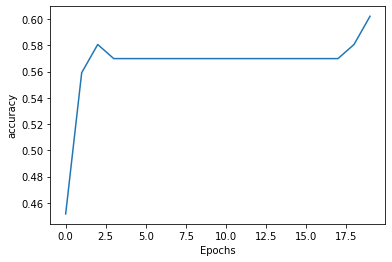

In [262]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.show()